In [2]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\alexandre\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


In [8]:
from PIL import Image
import math
import numpy as np

In [3]:
from skimage import io
img = io.imread('resized/IMG_2034.jpeg')

In [7]:
img.shape

(300, 300, 3)

In [141]:
def RGB2gray(image):
    #image = img_as_float(image)
    new = np.zeros([image.shape[0], image.shape[1]])
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image[i,j]
            gray = pixel[0]*0.299 + pixel[1]*0.587 + pixel[2]*0.114
            
            new[i,j] = int(gray)
    
    return new

c:\users\murilo\appdata\local\programs\python\python37\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


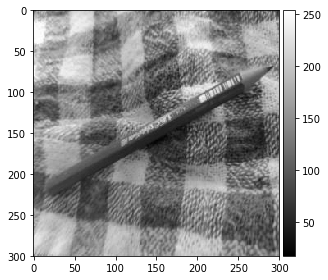

In [142]:
import matplotlib.pyplot as plt
gray = RGB2gray(img)
io.imshow(gray, cmap=plt.cm.gray)

In [143]:
def LogImage(imagegray):
    width, height = imagegray.shape
    
    new = np.zeros([width, height])
    
    for i in range(width):
        for j in range(height):
            pixel = imagegray[i,j]
            logged = (255/8)*math.log(pixel + 1,2)
            new[i,j] = int(logged)
    
    return new

In [144]:
def dist(i,j,zerox,zeroy):
    return math.sqrt((zerox - i)**2 + (zeroy-j)**2)

In [145]:
def gera_gradiente(imagegray):
    width, height = imagegray.shape
    midw = width/2
    midh = height/2
    maxDist = dist(0,0,midw,midh)
    
    new = np.zeros([width, height])
    
    for i in range(width):
        for j in range(height):
            #pixel = image.getpixel((i,j))
            tuple_pixel = int(255*((dist(i,j,midw,midh))/maxDist))
            new[i,j] = min(imagegray[i,j] + tuple_pixel,255)
    return new

In [146]:
grad = gera_gradiente(gray)

In [147]:
logged = LogImage(gray)

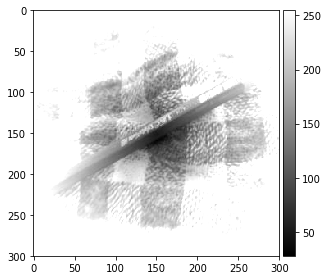

In [148]:
io.imshow(grad, cmap=plt.cm.gray)

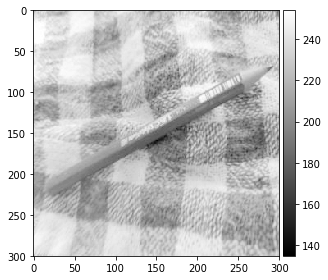

In [149]:
io.imshow(logged, cmap=plt.cm.gray)

In [150]:
def media_filtro(image):
    width, height = image.shape
    new = np.zeros([width, height])
    
    for i in range(0,width):
        for j in range(1,height):
            sum_ = 0
            num = 0
            min_i = i-1
            if i == 0:
                min_i = i
            max_i = i+1
            if i == width:
                min_i = i
            min_j = j-1
            if j == 0:
                min_j = j
            max_j = j+1
            if j == height:
                max_j = j
            
            for x in range(min_i,max_i):
                for y in range(min_j,max_j):
                    sum_ += image[x,y]
                    num += 1
            media = sum_/num
            new[i,j] = int(media)
    return new

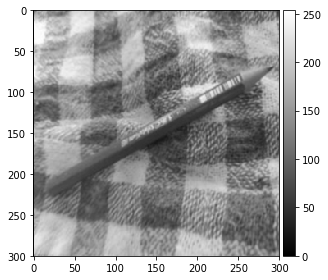

In [151]:
io.imshow(media_filtro(gray), cmap=plt.cm.gray)

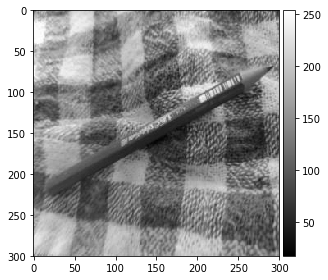

In [152]:
io.imshow(gray, cmap=plt.cm.gray)

In [153]:
def ExpImage(imagegray):
    width, height = imagegray.shape
    
    new = np.zeros([width, height])
    
    for i in range(width):
        for j in range(height):
            pixel = imagegray[i,j]
            expd = math.pow(1.02121,pixel)
            expd = expd/math.pow(1.02121,255)
            new[i,j] = int(expd*255)
    
    return new

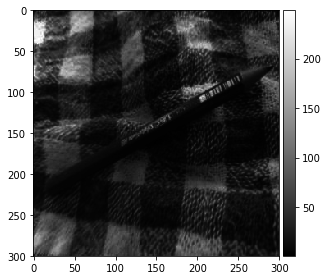

In [154]:
io.imshow(ExpImage(gray), cmap=plt.cm.gray)

In [155]:
import glob

In [156]:
file_names = glob.glob('resized/*')

In [157]:
len(file_names)

575

In [158]:
from tqdm import tqdm 

In [159]:
from skimage import exposure

for file in tqdm(file_names):
    img = io.imread(file)
    gray = RGB2gray(img)
    img_eq = gray
    file_path = file.replace('resized', 'aug_imgs/gray')
    io.imsave(file_path,img_eq)
    img_eq = ExpImage(gray)
    file_path = file.replace('resized', 'aug_imgs/exp')
    io.imsave(file_path,img_eq)
    img_eq = media_filtro(gray)
    file_path = file.replace('resized', 'aug_imgs/filter')
    io.imsave(file_path,img_eq)
    img_eq = LogImage(gray)
    file_path = file.replace('resized', 'aug_imgs/log')
    io.imsave(file_path,img_eq)
    img_eq = gera_gradiente(gray)
    file_path = file.replace('resized', 'aug_imgs/grad')
    io.imsave(file_path,img_eq)
    

  0%|                                                                                                                                                                                     | 0/575 [00:00<?, ?it/s]Lossy conversion from float64 to uint8. Range [28.0, 236.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 171.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 232.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [154.0, 251.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [154.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
  0%|▎                                                                                                                                                          

Lossy conversion from float64 to uint8. Range [8.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
  2%|██▉                                                                                                                                                                         | 10/575 [00:15<14:42,  1.56s/it]Lossy conversion from float64 to uint8. Range [1.0, 169.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 41.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 161.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [31.0, 236.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [8.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
  2%|███▎                               

Lossy conversion from float64 to uint8. Range [172.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [60.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
  3%|█████▉                                                                                                                                                                      | 20/575 [00:31<14:26,  1.56s/it]Lossy conversion from float64 to uint8. Range [8.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 244.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [101.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to ui

Lossy conversion from float64 to uint8. Range [0.0, 222.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [156.0, 249.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [41.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
  5%|████████▉                                                                                                                                                                   | 30/575 [00:47<14:23,  1.58s/it]Lossy conversion from float64 to uint8. Range [29.0, 225.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 135.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 220.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uin

Lossy conversion from float64 to uint8. Range [1.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [50.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [53.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
  7%|███████████▉                                                                                                                                                                | 40/575 [01:02<13:58,  1.57s/it]Lossy conversion from float64 to uint8. Range [17.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint

  9%|██████████████▋                                                                                                                                                             | 49/575 [01:17<13:49,  1.58s/it]Lossy conversion from float64 to uint8. Range [44.0, 252.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3.0, 239.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 244.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [175.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [86.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
  9%|██████████████▉                                                                                                                                             

Lossy conversion from float64 to uint8. Range [74.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 10%|█████████████████▋                                                                                                                                                          | 59/575 [01:33<13:39,  1.59s/it]Lossy conversion from float64 to uint8. Range [15.0, 211.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 101.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 200.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [127.0, 246.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [22.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 10%|█████████████████▉            

Lossy conversion from float64 to uint8. Range [105.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [18.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 12%|████████████████████▋                                                                                                                                                       | 69/575 [01:48<13:21,  1.58s/it]Lossy conversion from float64 to uint8. Range [23.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 244.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 244.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [146.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to u

Lossy conversion from float64 to uint8. Range [0.0, 224.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [215.0, 250.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [187.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 14%|███████████████████████▋                                                                                                                                                    | 79/575 [02:04<13:02,  1.58s/it]Lossy conversion from float64 to uint8. Range [17.0, 233.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 160.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 231.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to ui

Lossy conversion from float64 to uint8. Range [6.0, 171.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 234.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [202.0, 251.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [115.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 15%|██████████████████████████▌                                                                                                                                                 | 89/575 [02:20<12:54,  1.59s/it]Lossy conversion from float64 to uint8. Range [80.0, 236.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [6.0, 171.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to ui

 17%|█████████████████████████████▎                                                                                                                                              | 98/575 [02:34<12:35,  1.58s/it]Lossy conversion from float64 to uint8. Range [45.0, 246.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3.0, 211.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 237.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [176.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [115.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 17%|█████████████████████████████▌                                                                                                                             

Lossy conversion from float64 to uint8. Range [9.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 19%|████████████████████████████████                                                                                                                                           | 108/575 [02:50<12:25,  1.60s/it]Lossy conversion from float64 to uint8. Range [0.0, 249.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 224.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 248.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [7.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 19%|████████████████████████████████▍  

Lossy conversion from float64 to uint8. Range [132.0, 247.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [77.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 21%|███████████████████████████████████                                                                                                                                        | 118/575 [03:06<12:05,  1.59s/it]Lossy conversion from float64 to uint8. Range [16.0, 223.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 130.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 221.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [130.0, 248.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to u

Lossy conversion from float64 to uint8. Range [0.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [151.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [62.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 22%|██████████████████████████████████████                                                                                                                                     | 128/575 [03:22<11:54,  1.60s/it]Lossy conversion from float64 to uint8. Range [36.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 249.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 252.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uin

Lossy conversion from float64 to uint8. Range [2.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [149.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [55.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 24%|█████████████████████████████████████████                                                                                                                                  | 138/575 [03:38<11:32,  1.58s/it]Lossy conversion from float64 to uint8. Range [21.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uin

 26%|███████████████████████████████████████████▋                                                                                                                               | 147/575 [03:52<11:15,  1.58s/it]Lossy conversion from float64 to uint8. Range [41.0, 207.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 93.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 206.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [171.0, 245.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [87.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 26%|████████████████████████████████████████████                                                                                                                 

Lossy conversion from float64 to uint8. Range [30.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 27%|██████████████████████████████████████████████▋                                                                                                                            | 157/575 [04:08<11:05,  1.59s/it]Lossy conversion from float64 to uint8. Range [13.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 249.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 250.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [121.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [41.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 27%|██████████████████████████████

Lossy conversion from float64 to uint8. Range [105.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [84.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 29%|█████████████████████████████████████████████████▋                                                                                                                         | 167/575 [04:24<10:44,  1.58s/it]Lossy conversion from float64 to uint8. Range [31.0, 221.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 124.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 220.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [159.0, 248.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to u

Lossy conversion from float64 to uint8. Range [0.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [124.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [31.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 31%|████████████████████████████████████████████████████▋                                                                                                                      | 177/575 [04:40<10:30,  1.58s/it]Lossy conversion from float64 to uint8. Range [16.0, 252.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 239.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 245.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uin

Lossy conversion from float64 to uint8. Range [2.0, 249.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 251.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [170.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [60.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 33%|███████████████████████████████████████████████████████▌                                                                                                                   | 187/575 [04:56<10:19,  1.60s/it]Lossy conversion from float64 to uint8. Range [60.0, 244.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [4.0, 202.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uin

 34%|██████████████████████████████████████████████████████████▎                                                                                                                | 196/575 [05:10<10:04,  1.59s/it]Lossy conversion from float64 to uint8. Range [25.0, 250.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 229.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 235.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [149.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [35.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 34%|██████████████████████████████████████████████████████████▌                                                                                                 

Lossy conversion from float64 to uint8. Range [24.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 36%|█████████████████████████████████████████████████████████████▎                                                                                                             | 206/575 [05:26<09:47,  1.59s/it]Lossy conversion from float64 to uint8. Range [1.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 249.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 245.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [31.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [37.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 36%|████████████████████████████████

Lossy conversion from float64 to uint8. Range [130.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [45.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 38%|████████████████████████████████████████████████████████████████▏                                                                                                          | 216/575 [05:42<09:33,  1.60s/it]Lossy conversion from float64 to uint8. Range [0.0, 250.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 229.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 248.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint

Lossy conversion from float64 to uint8. Range [0.0, 210.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [140.0, 246.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [58.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 39%|███████████████████████████████████████████████████████████████████▏                                                                                                       | 226/575 [05:58<09:21,  1.61s/it]Lossy conversion from float64 to uint8. Range [23.0, 219.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 119.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 218.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uin

Lossy conversion from float64 to uint8. Range [1.0, 202.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 243.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [146.0, 252.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [58.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 41%|██████████████████████████████████████████████████████████████████████▏                                                                                                    | 236/575 [06:14<09:03,  1.60s/it]Lossy conversion from float64 to uint8. Range [2.0, 252.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 239.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint

 43%|████████████████████████████████████████████████████████████████████████▊                                                                                                  | 245/575 [06:29<08:48,  1.60s/it]Lossy conversion from float64 to uint8. Range [20.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [140.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [61.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 43%|█████████████████████████████████████████████████████████████████████████▏                                                                                  

Lossy conversion from float64 to uint8. Range [12.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 44%|███████████████████████████████████████████████████████████████████████████▊                                                                                               | 255/575 [06:45<08:33,  1.60s/it]Lossy conversion from float64 to uint8. Range [0.0, 248.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 220.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 242.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [75.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 45%|█████████████████████████████████

Lossy conversion from float64 to uint8. Range [89.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [67.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 46%|██████████████████████████████████████████████████████████████████████████████▊                                                                                            | 265/575 [07:01<08:18,  1.61s/it]Lossy conversion from float64 to uint8. Range [9.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 244.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 252.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [105.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uin

Lossy conversion from float64 to uint8. Range [0.0, 247.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [31.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [52.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 48%|█████████████████████████████████████████████████████████████████████████████████▊                                                                                         | 275/575 [07:17<08:05,  1.62s/it]Lossy conversion from float64 to uint8. Range [28.0, 201.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 82.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 200.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8

Lossy conversion from float64 to uint8. Range [1.0, 78.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 196.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [146.0, 243.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [77.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 50%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 285/575 [07:33<07:41,  1.59s/it]Lossy conversion from float64 to uint8. Range [24.0, 199.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 78.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8

 51%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 294/575 [07:47<07:27,  1.59s/it]Lossy conversion from float64 to uint8. Range [30.0, 220.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 122.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 219.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [157.0, 248.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [47.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 51%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                    

Lossy conversion from float64 to uint8. Range [78.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 53%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                | 304/575 [08:03<07:10,  1.59s/it]Lossy conversion from float64 to uint8. Range [53.0, 195.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3.0, 72.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 195.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [183.0, 242.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [69.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 53%|███████████████████████████████

Lossy conversion from float64 to uint8. Range [144.0, 248.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [37.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 55%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 314/575 [08:19<06:53,  1.59s/it]Lossy conversion from float64 to uint8. Range [11.0, 245.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 206.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 231.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [114.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to u

Lossy conversion from float64 to uint8. Range [0.0, 250.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [144.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [58.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 56%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 324/575 [08:35<06:49,  1.63s/it]Lossy conversion from float64 to uint8. Range [22.0, 251.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 234.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 249.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uin

Lossy conversion from float64 to uint8. Range [3.0, 154.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 213.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [180.0, 250.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [108.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 334/575 [08:51<06:25,  1.60s/it]Lossy conversion from float64 to uint8. Range [14.0, 203.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 85.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uin

 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                     | 343/575 [09:06<06:31,  1.69s/it]Lossy conversion from float64 to uint8. Range [9.0, 213.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 105.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 212.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [105.0, 246.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [53.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      

Lossy conversion from float64 to uint8. Range [23.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                  | 353/575 [09:24<06:06,  1.65s/it]Lossy conversion from float64 to uint8. Range [9.0, 210.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 99.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 206.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [105.0, 246.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [21.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 62%|████████████████████████████████

Lossy conversion from float64 to uint8. Range [169.0, 242.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [95.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 363/575 [09:40<05:40,  1.61s/it]Lossy conversion from float64 to uint8. Range [5.0, 191.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 66.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 190.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [82.0, 241.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint

Lossy conversion from float64 to uint8. Range [0.0, 225.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [121.0, 249.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [39.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                            | 373/575 [09:56<05:21,  1.59s/it]Lossy conversion from float64 to uint8. Range [26.0, 213.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 105.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 211.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uin

Lossy conversion from float64 to uint8. Range [2.0, 144.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 209.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [149.0, 249.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [38.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                         | 383/575 [10:12<05:04,  1.58s/it]Lossy conversion from float64 to uint8. Range [27.0, 201.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 82.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 392/575 [10:26<04:50,  1.59s/it]Lossy conversion from float64 to uint8. Range [8.0, 216.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 112.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 211.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [101.0, 247.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [29.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        

Lossy conversion from float64 to uint8. Range [29.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 402/575 [10:42<04:34,  1.59s/it]Lossy conversion from float64 to uint8. Range [20.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 244.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 252.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [140.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [54.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 70%|██████████████████████████████

Lossy conversion from float64 to uint8. Range [164.0, 236.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [62.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 412/575 [10:58<04:22,  1.61s/it]Lossy conversion from float64 to uint8. Range [8.0, 176.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 48.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 176.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [101.0, 238.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uin

Lossy conversion from float64 to uint8. Range [0.0, 217.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [110.0, 249.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [37.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 422/575 [11:14<04:08,  1.62s/it]Lossy conversion from float64 to uint8. Range [17.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 249.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 252.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uin

Lossy conversion from float64 to uint8. Range [1.0, 46.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 170.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [132.0, 237.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [76.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 432/575 [11:30<03:52,  1.62s/it]Lossy conversion from float64 to uint8. Range [26.0, 239.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 182.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                       | 441/575 [11:45<03:32,  1.58s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [5.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            

Lossy conversion from float64 to uint8. Range [8.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 451/575 [12:01<03:15,  1.58s/it]Lossy conversion from float64 to uint8. Range [0.0, 252.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 239.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 248.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [6.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 79%|███████████████████████████████████

Lossy conversion from float64 to uint8. Range [74.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [27.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 461/575 [12:16<02:59,  1.57s/it]Lossy conversion from float64 to uint8. Range [14.0, 251.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 234.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 248.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [124.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to ui

Lossy conversion from float64 to uint8. Range [0.0, 248.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [5.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                               | 471/575 [12:32<02:45,  1.59s/it]Lossy conversion from float64 to uint8. Range [0.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 244.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 247.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. 

Lossy conversion from float64 to uint8. Range [1.0, 59.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 164.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [63.0, 240.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [25.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 481/575 [12:48<02:27,  1.57s/it]Lossy conversion from float64 to uint8. Range [3.0, 185.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 58.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. 

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 490/575 [13:02<02:13,  1.57s/it]Lossy conversion from float64 to uint8. Range [2.0, 236.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 171.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 230.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [50.0, 251.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [33.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            

Lossy conversion from float64 to uint8. Range [21.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 500/575 [13:18<01:56,  1.56s/it]Lossy conversion from float64 to uint8. Range [2.0, 249.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 224.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 247.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [50.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [30.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 87%|████████████████████████████████

Lossy conversion from float64 to uint8. Range [31.0, 252.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [42.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 510/575 [13:33<01:41,  1.56s/it]Lossy conversion from float64 to uint8. Range [0.0, 240.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 186.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 234.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 252.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8

Lossy conversion from float64 to uint8. Range [0.0, 187.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [50.0, 247.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [35.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 520/575 [13:49<01:25,  1.56s/it]Lossy conversion from float64 to uint8. Range [3.0, 213.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 105.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 193.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8

Lossy conversion from float64 to uint8. Range [1.0, 249.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [105.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [41.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 530/575 [14:04<01:10,  1.56s/it]Lossy conversion from float64 to uint8. Range [10.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uin

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 539/575 [14:19<00:56,  1.56s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [15.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

Lossy conversion from float64 to uint8. Range [21.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 549/575 [14:34<00:40,  1.56s/it]Lossy conversion from float64 to uint8. Range [15.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [127.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [37.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 96%|██████████████████████████████

Lossy conversion from float64 to uint8. Range [0.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [8.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 559/575 [14:50<00:24,  1.56s/it]Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 254.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. 

Lossy conversion from float64 to uint8. Range [0.0, 225.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [50.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [21.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 569/575 [15:05<00:09,  1.57s/it]Lossy conversion from float64 to uint8. Range [3.0, 231.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 154.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 206.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8